## Homework 23: Autoencoder
**Conditions**: 
- Dataset: CIFAR10

**Goal**: create and configure an autoencoder to extract image features and execute them

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

/mnt/VOL/anaconda3/envs/teachme/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load and pre-process the CIFAR-10 dataset.

In [2]:
# Set the path to download CIFAR-10. The data will be automatically downloaded if it does not exist.
data_path = './data/'

# Define the transformations that will be applied to the data.
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors (0-1).
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize data.
])

# Load CIFAR-10 and apply the transformations.
train_dataset = torchvision.datasets.CIFAR10(root=data_path, train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root=data_path, train=False, transform=transform, download=True)

# Load data into DataLoader for easier processing.
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


## Create a basic autoencoder architecture with an encoder and a decoder.

In [3]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  # Use sigmoid to constrain values in the range [0, 1]
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

## Train the autoencoder on the data set and evaluate the quality of restoration on the validation set.

In [4]:
autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters())  

In [5]:
num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

Epoch 1, Loss: 0.2095215633473433
Epoch 2, Loss: 0.15364336697837275
Epoch 3, Loss: 0.1504868116810956
Epoch 4, Loss: 0.14855767740770373
Epoch 5, Loss: 0.1474211417672122
Epoch 6, Loss: 0.14656332486768817
Epoch 7, Loss: 0.14602574391666887
Epoch 8, Loss: 0.14561525015803553
Epoch 9, Loss: 0.14538254242037874
Epoch 10, Loss: 0.14512966302654629
Training finished


In [6]:
validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

Validation Loss: 0.14193577770214932


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
    (1): Sigmoid()
  )
)

In [7]:
# Function for visualizing original and reconstructed images
def visualize_images(original_images, reconstructed_images, num_images=10):
    fig, axes = plt.subplots(2, num_images, figsize=(20, 4))

    for i in range(num_images):
        # Visualizing original images
        original_image = np.transpose(original_images[i].detach().numpy(), (1, 2, 0)) / 2 + 0.5
        axes[0, i].imshow(original_image)
        axes[0, i].get_xaxis().set_visible(False)
        axes[0, i].get_yaxis().set_visible(False)

        # Visualizing reconstructed images
        reconstructed_image = np.transpose(reconstructed_images[i].detach().numpy(), (1, 2, 0)) / 2 + 0.5
        axes[1, i].imshow(reconstructed_image)
        axes[1, i].get_xaxis().set_visible(False)
        axes[1, i].get_yaxis().set_visible(False)

    plt.show()

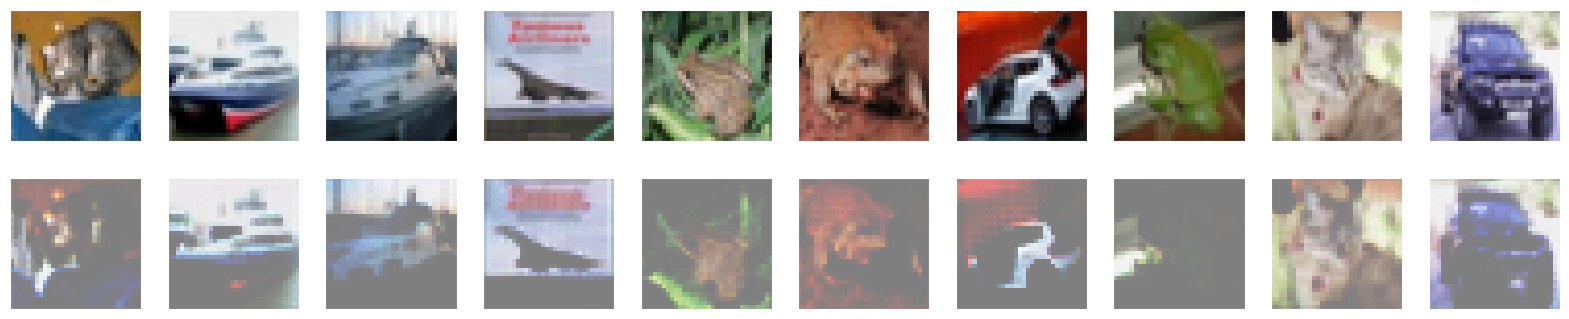

In [8]:
# Get several samples from the validation dataset
dataiter = iter(test_loader)
images, _ = next(dataiter)

# Pass them through an autoencoder to get reconstructed images
reconstructed_images, _ = autoencoder(images)

# Call the function to visualize
visualize_images(images, reconstructed_images, num_images=10)

## Experiment with encoder and decoder architectures by changing the number of layers, layer sizes, and activation functions.

2 layers

Epoch 1, Loss: 0.18726965119047542
Epoch 2, Loss: 0.15399663153168797
Epoch 3, Loss: 0.1518195029586325
Epoch 4, Loss: 0.1505582181217573
Epoch 5, Loss: 0.14950656413536548
Epoch 6, Loss: 0.14880687564306552
Epoch 7, Loss: 0.14834460937191762
Epoch 8, Loss: 0.14798639836671101
Epoch 9, Loss: 0.14767564629273647
Epoch 10, Loss: 0.14745719476467203
Training finished
Validation Loss: 0.14431471002709334


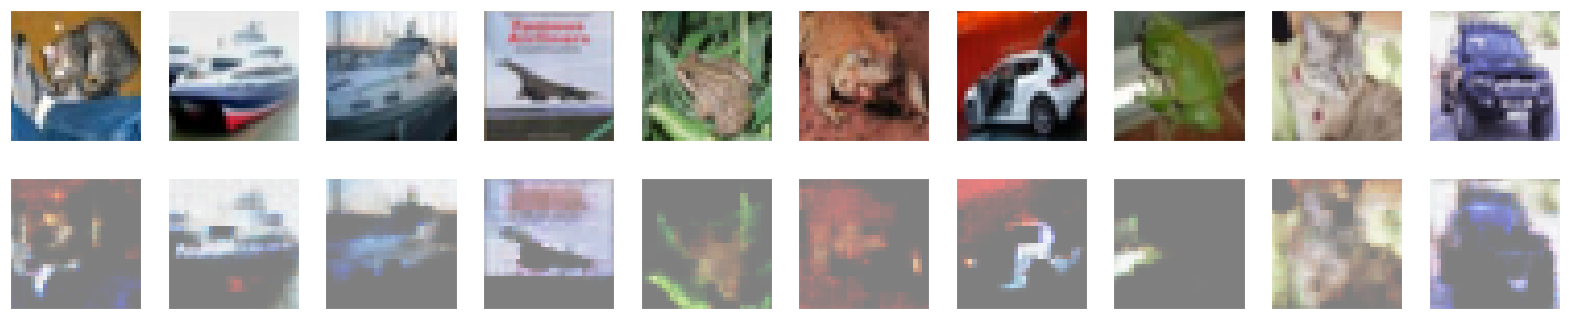

In [9]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  

num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

3 layers

Epoch 1, Loss: 0.20333588409149433
Epoch 2, Loss: 0.1663643223188265
Epoch 3, Loss: 0.1582514728178911
Epoch 4, Loss: 0.15600761012805392
Epoch 5, Loss: 0.15481973751007444
Epoch 6, Loss: 0.15410416666656504
Epoch 7, Loss: 0.15348104785775285
Epoch 8, Loss: 0.15303068331745276
Epoch 9, Loss: 0.15270138847286743
Epoch 10, Loss: 0.15240817610412608
Training finished
Validation Loss: 0.14936040968272338


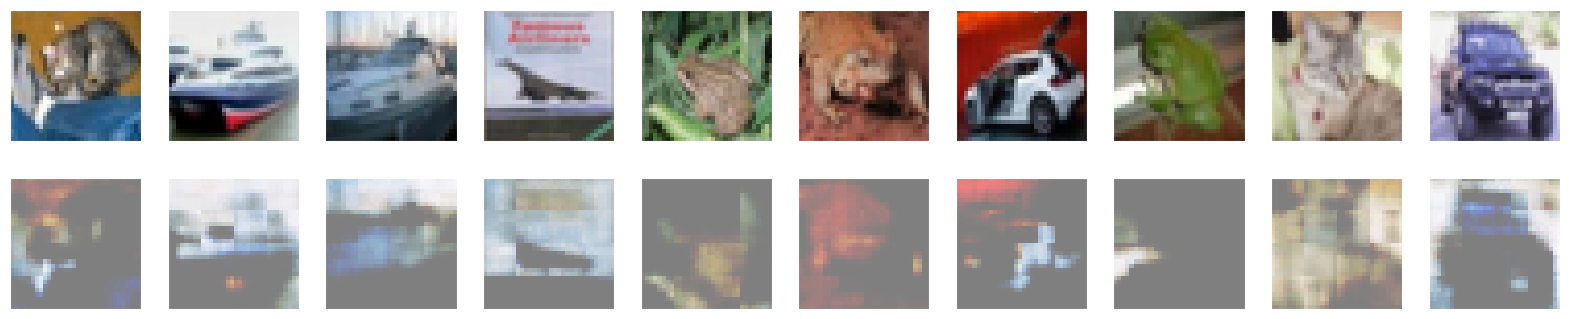

In [10]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)   

num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)   
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

Epoch 1, Loss: 0.1698373544037037
Epoch 2, Loss: 0.15232489478138403
Epoch 3, Loss: 0.15006834760193935
Epoch 4, Loss: 0.14895670227420604
Epoch 5, Loss: 0.1482364011790289
Epoch 6, Loss: 0.14766628254214517
Epoch 7, Loss: 0.14736022233315135
Epoch 8, Loss: 0.1469638077137263
Epoch 9, Loss: 0.14670021523295157
Epoch 10, Loss: 0.14647127222984344
Training finished
Validation Loss: 0.14355398676577646


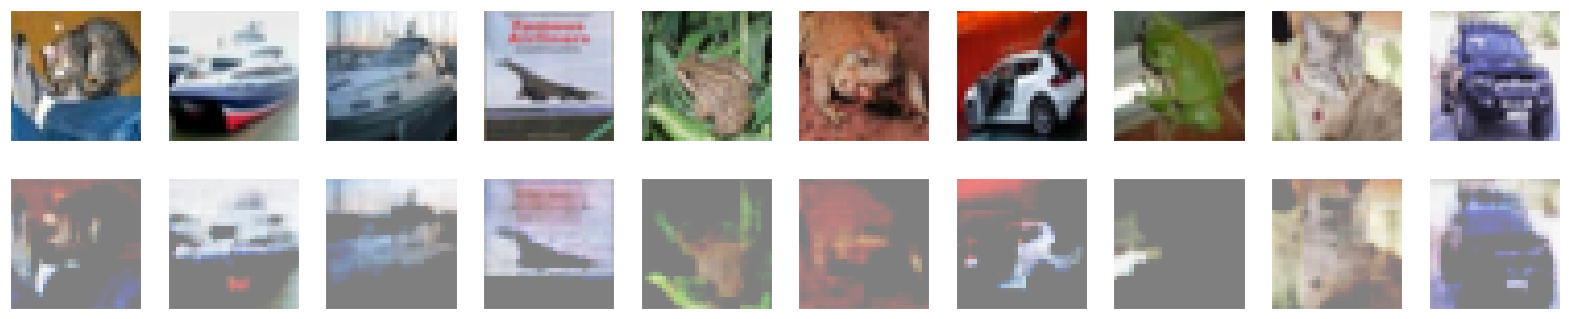

In [11]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64) 
criterion = nn.MSELoss() 
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  

num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

1 layer, Tahn() activation function

Epoch 1, Loss: 0.2123648328778079
Epoch 2, Loss: 0.1556462958798079
Epoch 3, Loss: 0.15104212740536235
Epoch 4, Loss: 0.14871401479825033
Epoch 5, Loss: 0.14740738568022427
Epoch 6, Loss: 0.1465767944217338
Epoch 7, Loss: 0.14596313634491942
Epoch 8, Loss: 0.14550174387824505
Epoch 9, Loss: 0.1452275249068542
Epoch 10, Loss: 0.14488988105788866
Training finished
Validation Loss: 0.14176448899659383


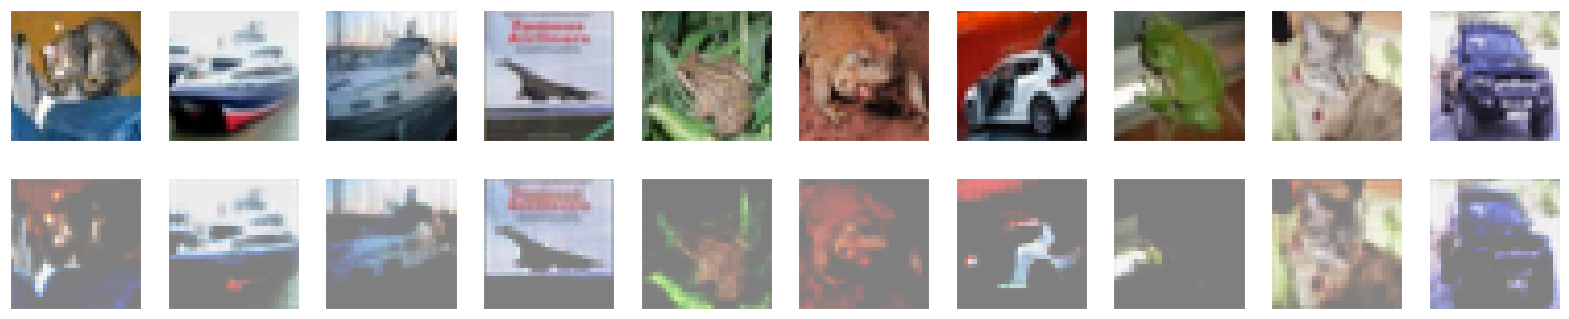

In [12]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  

num_epochs = 10  
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)          
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

1 layer, Sigmoid() activation function

Epoch 1, Loss: 0.2337108529208566
Epoch 2, Loss: 0.17711175726655196
Epoch 3, Loss: 0.17092898537588241
Epoch 4, Loss: 0.16510379430659286
Epoch 5, Loss: 0.16015573498576194
Epoch 6, Loss: 0.15759886751699326
Epoch 7, Loss: 0.15596165031652012
Epoch 8, Loss: 0.15434718550280538
Epoch 9, Loss: 0.15285743959724446
Epoch 10, Loss: 0.15174280172761748
Training finished
Validation Loss: 0.14830607451071406


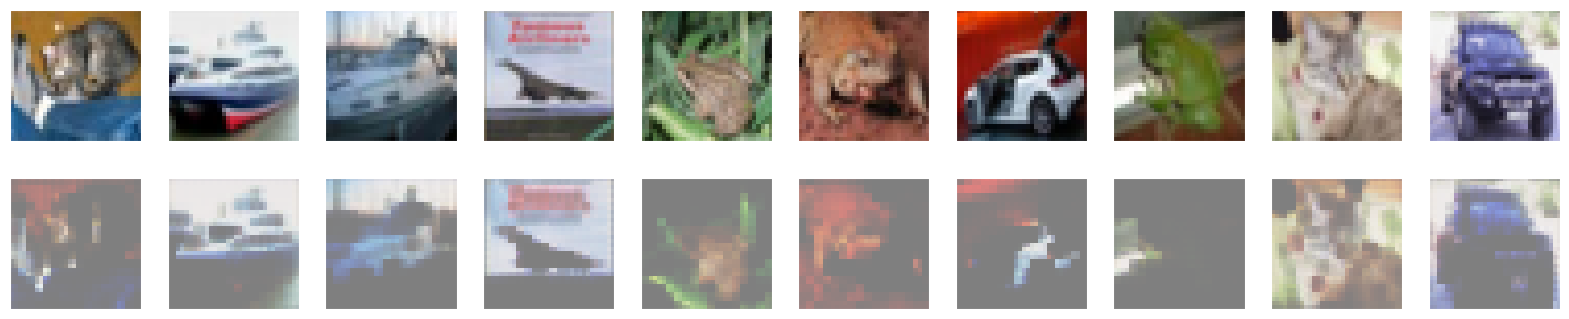

In [13]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  

num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

1 layer, LeakyReLU(0.2) activation function

Epoch 1, Loss: 0.21417422976602069
Epoch 2, Loss: 0.15304011483783916
Epoch 3, Loss: 0.14923790606010295
Epoch 4, Loss: 0.14767006587456255
Epoch 5, Loss: 0.1467092382766859
Epoch 6, Loss: 0.14608695363754506
Epoch 7, Loss: 0.14559733629455346
Epoch 8, Loss: 0.1453342276060825
Epoch 9, Loss: 0.1451315717662082
Epoch 10, Loss: 0.14490559539945838
Training finished
Validation Loss: 0.14179497990448764


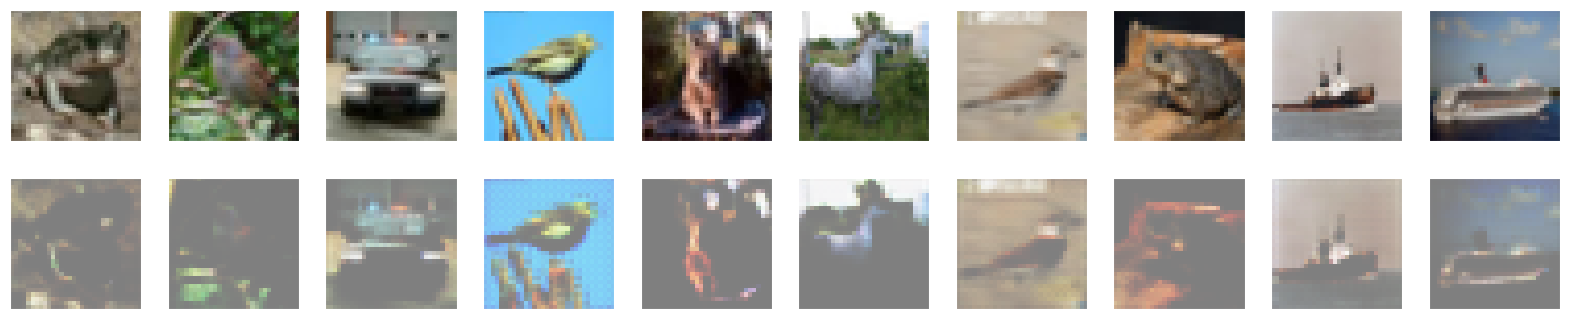

In [14]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code

autoencoder = Autoencoder(code_dim=64)  
criterion = nn.MSELoss()  
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  

num_epochs = 10  

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training finished")

validation_loss = 0.0

autoencoder.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        outputs, _ = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        validation_loss += loss.item()

print(f"Validation Loss: {validation_loss/len(test_loader)}")

autoencoder.train()

images, _ = next(dataiter)

reconstructed_images, _ = autoencoder(images)

visualize_images(images, reconstructed_images, num_images=10)

## Explore various optimization methods (e.g. Adam, SGD) and their hyperparameters. Select the optimal optimization method and adjust its parameters for better convergence.

In [16]:
class Autoencoder(nn.Module):
    def __init__(self, code_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )

    def forward(self, x):
        code = self.encoder(x)
        reconstructed = self.decoder(code)
        return reconstructed, code


Adam

Epoch 1, Loss: 0.20361634455335414
Epoch 2, Loss: 0.1525422908422892
Epoch 3, Loss: 0.1489638342138599
Epoch 4, Loss: 0.14733711100371596
Epoch 5, Loss: 0.14634141198280828
Epoch 6, Loss: 0.145780021224714
Epoch 7, Loss: 0.1454650011208966
Epoch 8, Loss: 0.14524602297398134
Epoch 9, Loss: 0.14499977117647295
Epoch 10, Loss: 0.1448672667926992
Training finished
lr=0.001, wd=1e-06
Validation Loss: 0.14171630466819568


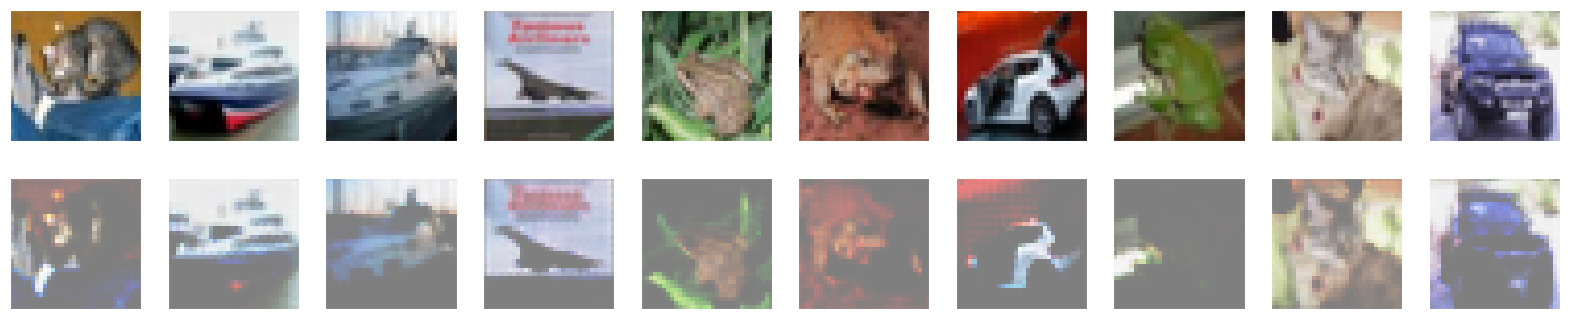

Epoch 1, Loss: 0.19934392714744334
Epoch 2, Loss: 0.15513172941020384
Epoch 3, Loss: 0.14971852045306158
Epoch 4, Loss: 0.14825326383418744
Epoch 5, Loss: 0.14721956444175346
Epoch 6, Loss: 0.1464683597483446
Epoch 7, Loss: 0.14619971290611855
Epoch 8, Loss: 0.14600084708703448
Epoch 9, Loss: 0.14587911868186862
Epoch 10, Loss: 0.1457388071948305
Training finished
lr=0.001, wd=0.0001
Validation Loss: 0.1426394969035106


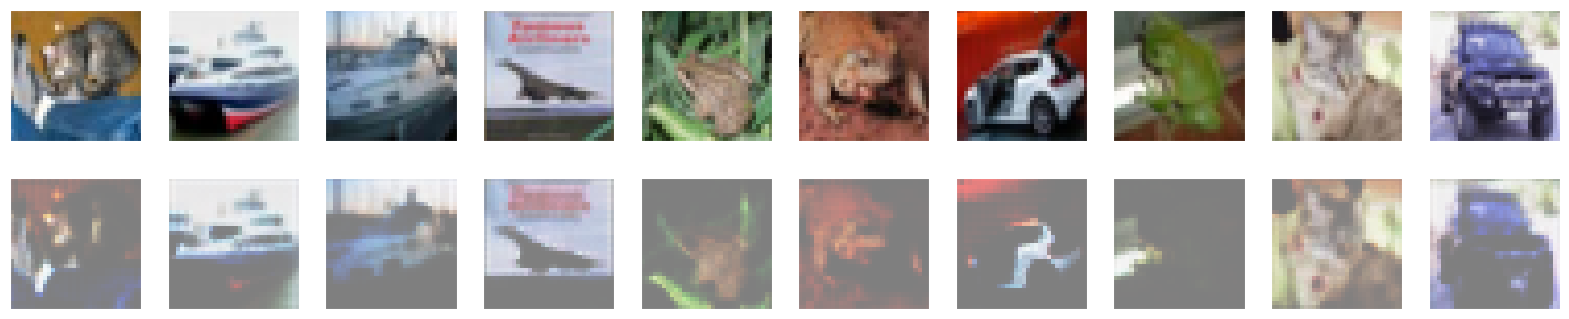

Epoch 1, Loss: 0.23939602846837105
Epoch 2, Loss: 0.1866187566076703
Epoch 3, Loss: 0.18567535488882944
Epoch 4, Loss: 0.18532210506517868
Epoch 5, Loss: 0.18508885358757984
Epoch 6, Loss: 0.18501167115576736
Epoch 7, Loss: 0.184972463704436
Epoch 8, Loss: 0.18500902475146078
Epoch 9, Loss: 0.18495318516517234
Epoch 10, Loss: 0.18501522029985856
Training finished
lr=0.001, wd=0.01
Validation Loss: 0.1823285737424899


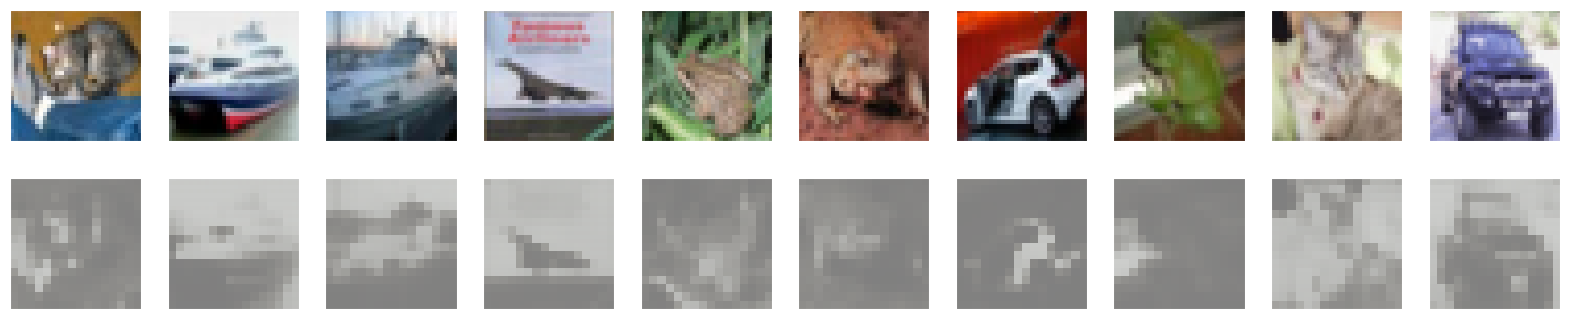

Epoch 1, Loss: 0.1547537983092658
Epoch 2, Loss: 0.14524384483199596
Epoch 3, Loss: 0.1446805849499867
Epoch 4, Loss: 0.14452750782680024
Epoch 5, Loss: 0.14443209273812105
Epoch 6, Loss: 0.14436447284067683
Epoch 7, Loss: 0.14433647105303568
Epoch 8, Loss: 0.14428689770991235
Epoch 9, Loss: 0.14422172290818466
Epoch 10, Loss: 0.1441846008476851
Training finished
lr=0.01, wd=1e-06
Validation Loss: 0.14110192879559888


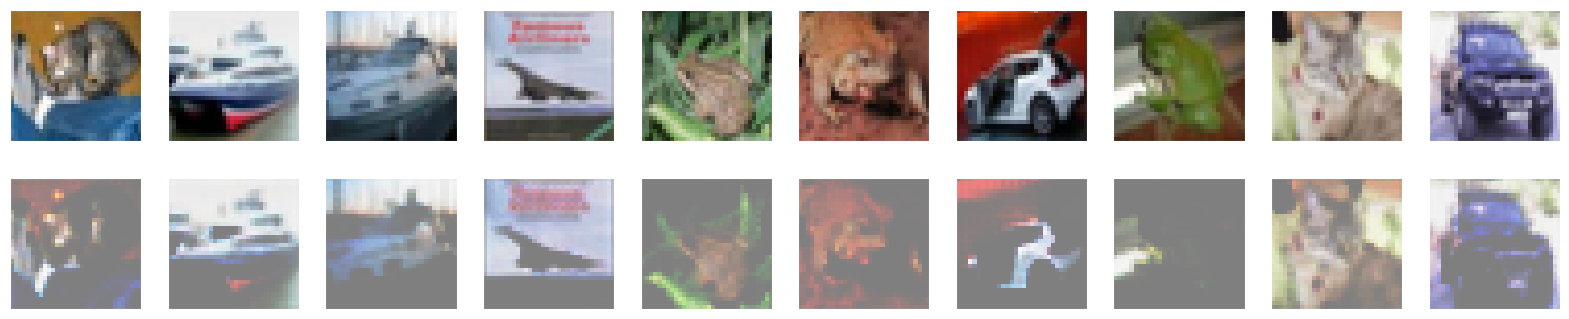

Epoch 1, Loss: 0.15534804865260562
Epoch 2, Loss: 0.1461099703198351
Epoch 3, Loss: 0.1456991797098723
Epoch 4, Loss: 0.14558747373616604
Epoch 5, Loss: 0.14543702671556827
Epoch 6, Loss: 0.14541737653334122
Epoch 7, Loss: 0.14542936091609013
Epoch 8, Loss: 0.1454351896234333
Epoch 9, Loss: 0.14539920103252696
Epoch 10, Loss: 0.14544475262465378
Training finished
lr=0.01, wd=0.0001
Validation Loss: 0.1423301995275127


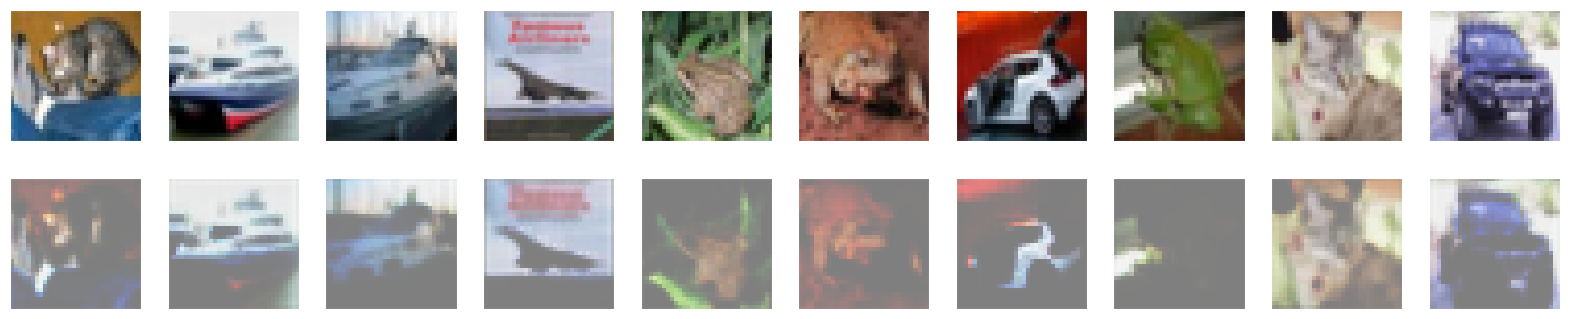

Epoch 1, Loss: 0.19069817624128688
Epoch 2, Loss: 0.18512773277509548
Epoch 3, Loss: 0.18511566083373315
Epoch 4, Loss: 0.1851215024509698
Epoch 5, Loss: 0.1850911555121012
Epoch 6, Loss: 0.18510364516235678
Epoch 7, Loss: 0.18509809918644482
Epoch 8, Loss: 0.1850946660503707
Epoch 9, Loss: 0.18516639054126446
Epoch 10, Loss: 0.1851355213567119
Training finished
lr=0.01, wd=0.01
Validation Loss: 0.18124792435366638


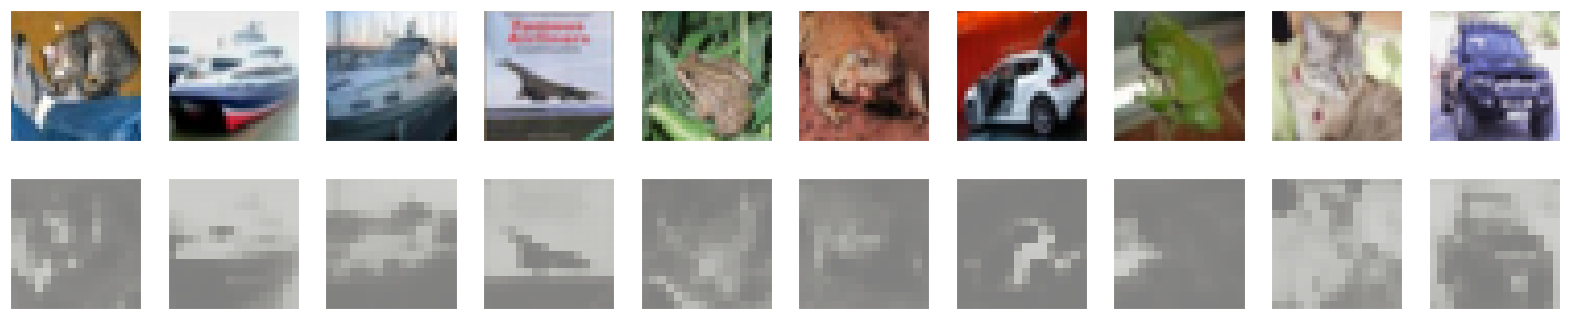

Epoch 1, Loss: 0.14938952776667713
Epoch 2, Loss: 0.144801863338179
Epoch 3, Loss: 0.14453479834377309
Epoch 4, Loss: 0.14439887818320632
Epoch 5, Loss: 0.14445735681849672
Epoch 6, Loss: 0.14452322280925253
Epoch 7, Loss: 0.14449923305445925
Epoch 8, Loss: 0.14446714517596126
Epoch 9, Loss: 0.1445339393261296
Epoch 10, Loss: 0.14455999332049008
Training finished
lr=0.1, wd=1e-06
Validation Loss: 0.1413259024073364


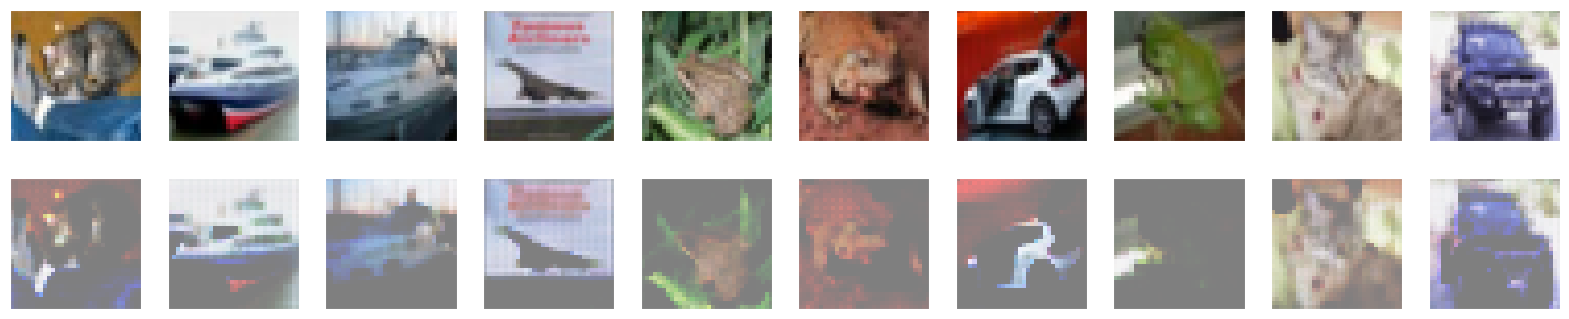

Epoch 1, Loss: 0.14878301688319887
Epoch 2, Loss: 0.1459102442540476
Epoch 3, Loss: 0.14586336757330334
Epoch 4, Loss: 0.14577976363661038
Epoch 5, Loss: 0.14582134726102394
Epoch 6, Loss: 0.1459237940685676
Epoch 7, Loss: 0.1458161387716413
Epoch 8, Loss: 0.14587500534208533
Epoch 9, Loss: 0.14589060123657327
Epoch 10, Loss: 0.14585868098661112
Training finished
lr=0.1, wd=0.0001
Validation Loss: 0.14242610506191375


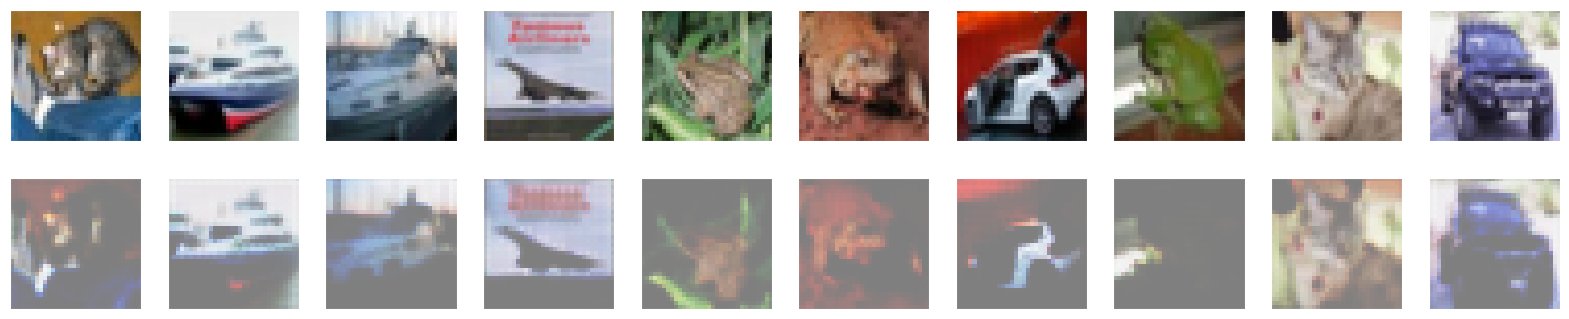

Epoch 1, Loss: 0.18661850828039067
Epoch 2, Loss: 0.18568269098582474
Epoch 3, Loss: 0.18571224008374812
Epoch 4, Loss: 0.18561071832009288
Epoch 5, Loss: 0.18562113196419938
Epoch 6, Loss: 0.18564116735668743
Epoch 7, Loss: 0.18575576433668967
Epoch 8, Loss: 0.18568828442822333
Epoch 9, Loss: 0.18570786527812938
Epoch 10, Loss: 0.18559688133428165
Training finished
lr=0.1, wd=0.01
Validation Loss: 0.18005468900416308


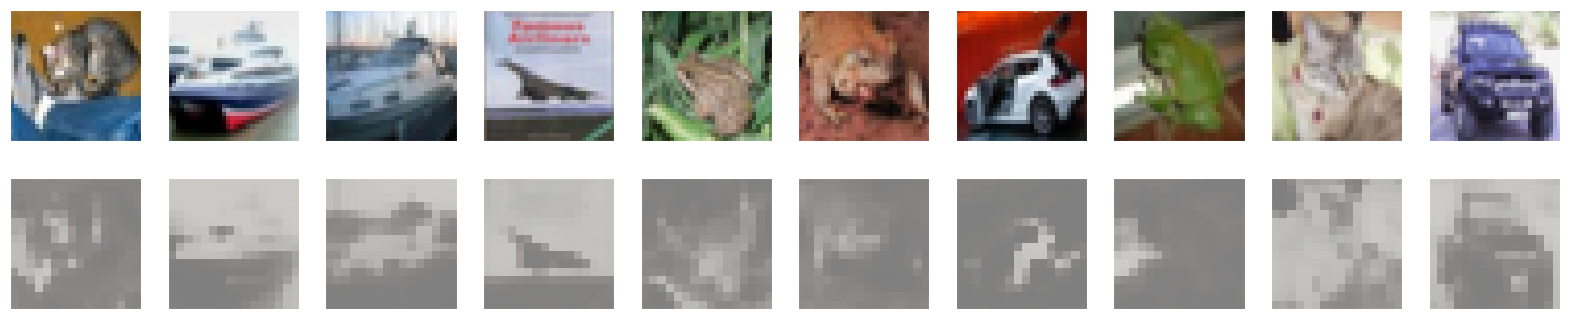

In [17]:
lr_params = [0.001, 0.01, 0.1]
wd_params = [1e-6, 1e-4, 1e-2]

for learning_rate in lr_params:
    for wd in wd_params:
        autoencoder = Autoencoder(code_dim=64)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate, weight_decay=wd)

        num_epochs = 10

        for epoch in range(num_epochs):
            running_loss = 0.0
            for data in train_loader:
                inputs, _ = data
                optimizer.zero_grad()
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

        print("Training finished")

        validation_loss = 0.0

        autoencoder.eval()

        with torch.no_grad():
            for data in test_loader:
                inputs, _ = data
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs)
                validation_loss += loss.item()

        print(f"lr={learning_rate}, wd={wd}\nValidation Loss: {validation_loss/len(test_loader)}")

        autoencoder.train()

        dataiter = iter(test_loader)
        images, _ = next(dataiter)

        reconstructed_images, _ = autoencoder(images)

        visualize_images(images, reconstructed_images, num_images=10)

SGD

Epoch 1, Loss: 0.6178935885124499
Epoch 2, Loss: 0.5848835845813727
Epoch 3, Loss: 0.5545381375057313
Epoch 4, Loss: 0.5262835353917783
Epoch 5, Loss: 0.4994037631908646
Epoch 6, Loss: 0.4742206744373302
Epoch 7, Loss: 0.4500177737773227
Epoch 8, Loss: 0.4268733668891365
Epoch 9, Loss: 0.4046818600286303
Epoch 10, Loss: 0.38357513799996634
Training finished
lr=0.001, wd=1e-06
Validation Loss: 0.3684983111111222


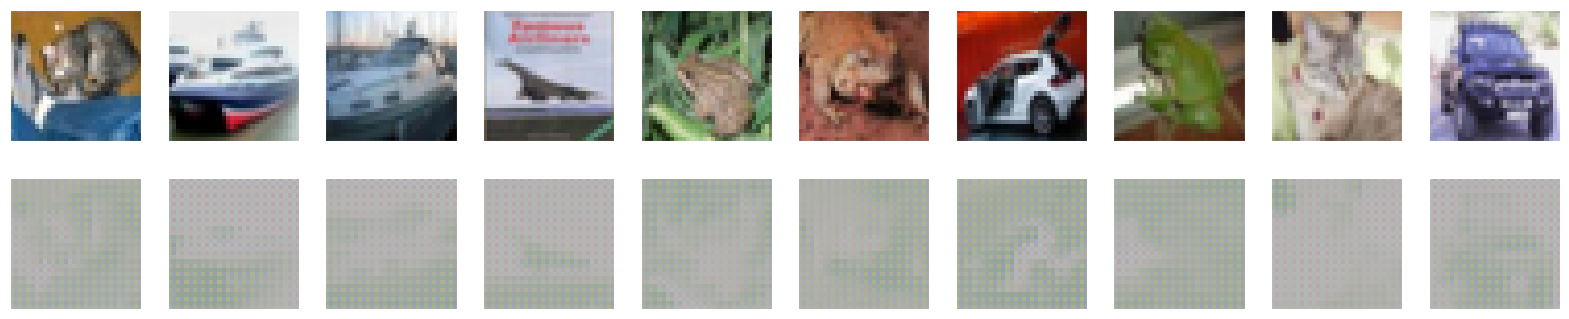

Epoch 1, Loss: 0.5853824168824784
Epoch 2, Loss: 0.551032692193985
Epoch 3, Loss: 0.5186917739527305
Epoch 4, Loss: 0.4883777546836897
Epoch 5, Loss: 0.4598882851926872
Epoch 6, Loss: 0.43315045101106014
Epoch 7, Loss: 0.40806489390180545
Epoch 8, Loss: 0.38461490108838775
Epoch 9, Loss: 0.36292621710568745
Epoch 10, Loss: 0.3429853922646979
Training finished
lr=0.001, wd=0.0001
Validation Loss: 0.32929022790520057


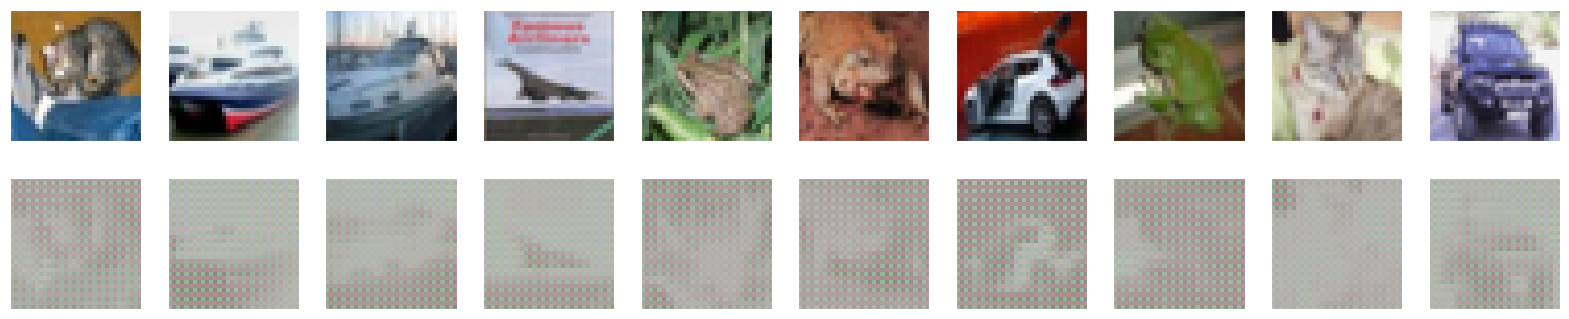

Epoch 1, Loss: 0.5549034520869365
Epoch 2, Loss: 0.5243493137152299
Epoch 3, Loss: 0.49476856705935107
Epoch 4, Loss: 0.46607617001094476
Epoch 5, Loss: 0.4383340137236563
Epoch 6, Loss: 0.4118370097082899
Epoch 7, Loss: 0.38693618629594595
Epoch 8, Loss: 0.36397767158420496
Epoch 9, Loss: 0.34318004579037964
Epoch 10, Loss: 0.32476504116564453
Training finished
lr=0.001, wd=0.01
Validation Loss: 0.31235228374505497


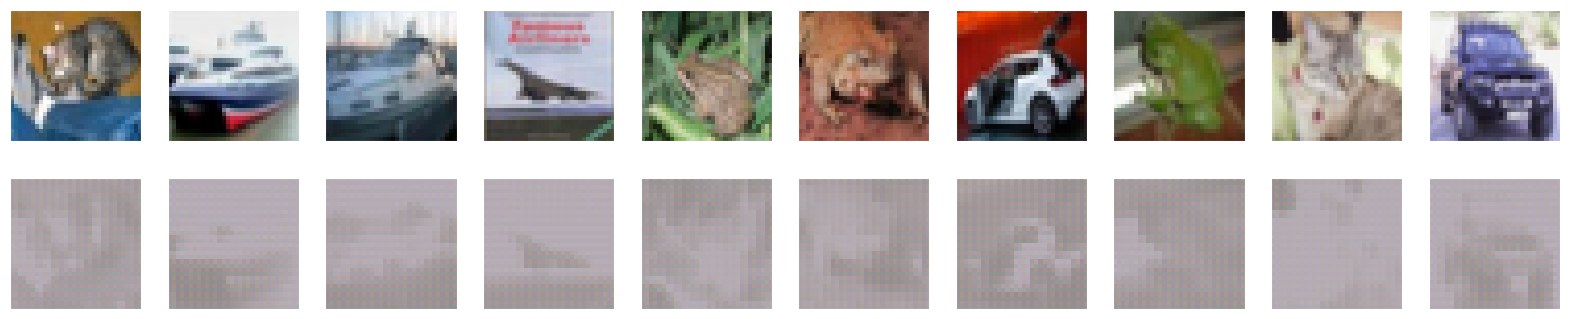

Epoch 1, Loss: 0.4401385145800193
Epoch 2, Loss: 0.2561757593508572
Epoch 3, Loss: 0.21303405220170155
Epoch 4, Loss: 0.19930013635045732
Epoch 5, Loss: 0.19171033168921386
Epoch 6, Loss: 0.18615548104962423
Epoch 7, Loss: 0.1816798208086082
Epoch 8, Loss: 0.17802105788760783
Epoch 9, Loss: 0.1750412998563798
Epoch 10, Loss: 0.1727374889280485
Training finished
lr=0.01, wd=1e-06
Validation Loss: 0.16889511067776164


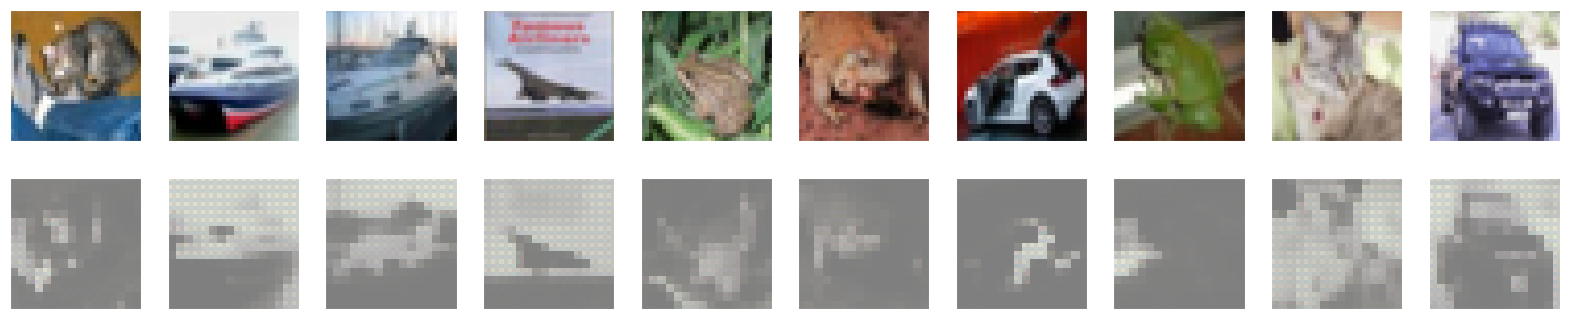

Epoch 1, Loss: 0.48981172757228014
Epoch 2, Loss: 0.31786558864747777
Epoch 3, Loss: 0.238542648094237
Epoch 4, Loss: 0.21251012039992512
Epoch 5, Loss: 0.2002991358642383
Epoch 6, Loss: 0.1919195693357826
Epoch 7, Loss: 0.1852587555413661
Epoch 8, Loss: 0.17997804785247348
Epoch 9, Loss: 0.17604405396734663
Epoch 10, Loss: 0.173269050105301
Training finished
lr=0.01, wd=0.0001
Validation Loss: 0.16929669981929146


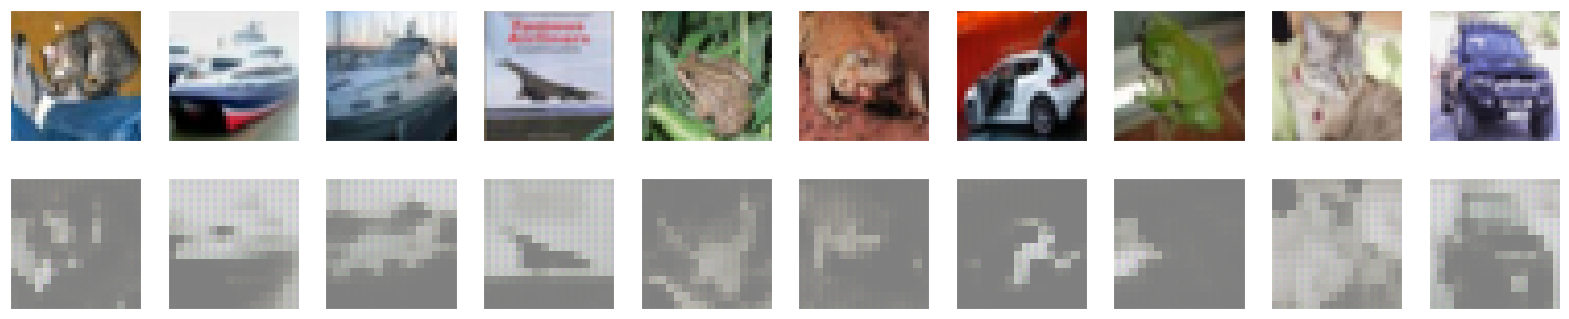

Epoch 1, Loss: 0.431554382300133
Epoch 2, Loss: 0.2885483073456513
Epoch 3, Loss: 0.2346584859216
Epoch 4, Loss: 0.21591647849668322
Epoch 5, Loss: 0.20672624554399335
Epoch 6, Loss: 0.20105168844580346
Epoch 7, Loss: 0.19694585513199686
Epoch 8, Loss: 0.19405652992332073
Epoch 9, Loss: 0.19192717165288414
Epoch 10, Loss: 0.19036569183363633
Training finished
lr=0.01, wd=0.01
Validation Loss: 0.1868857598988114


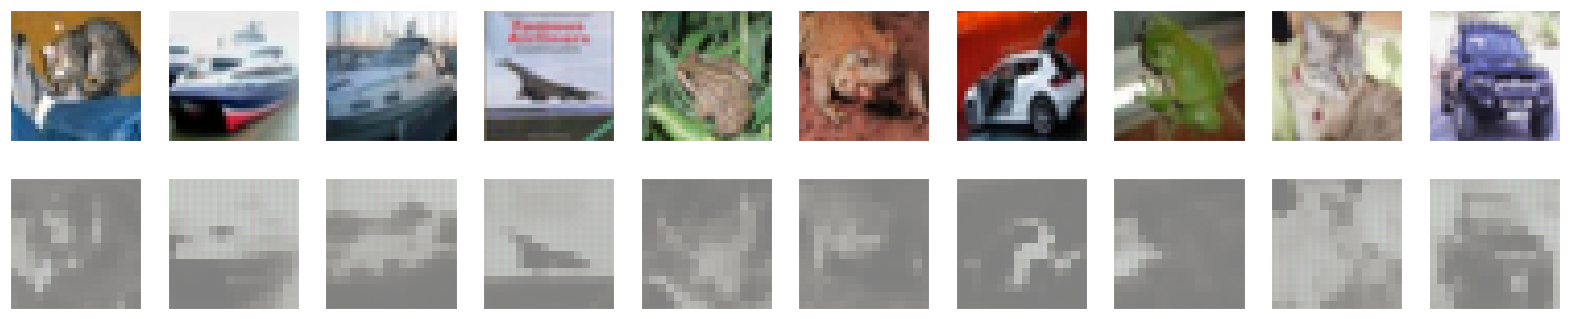

Epoch 1, Loss: 0.2248582337099268
Epoch 2, Loss: 0.1663524569071772
Epoch 3, Loss: 0.16232398590620825
Epoch 4, Loss: 0.1602503025661344
Epoch 5, Loss: 0.15865262736902214
Epoch 6, Loss: 0.15722972739611746
Epoch 7, Loss: 0.15606242302052506
Epoch 8, Loss: 0.1551100415608767
Epoch 9, Loss: 0.15448515052380768
Epoch 10, Loss: 0.15391695040190007
Training finished
lr=0.1, wd=1e-06
Validation Loss: 0.15073522128117312


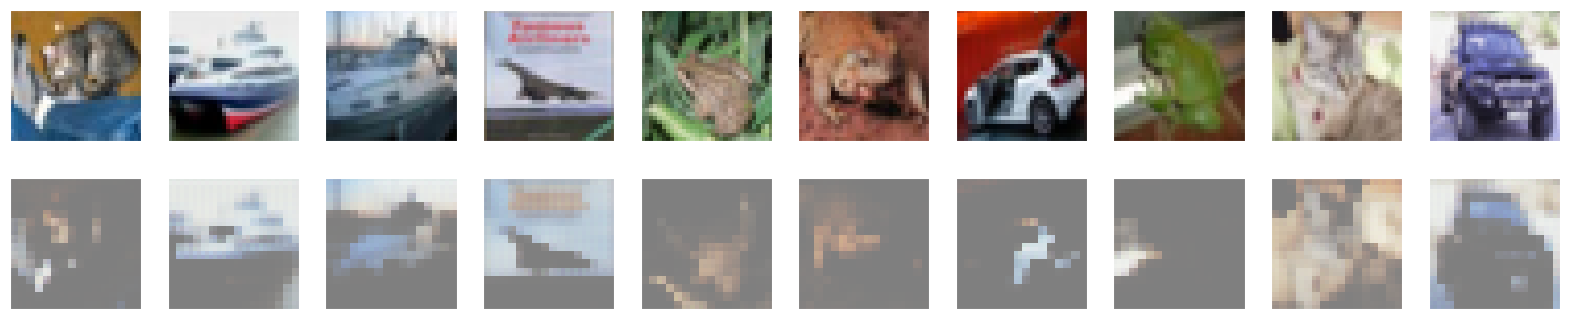

Epoch 1, Loss: 0.21969503048054703
Epoch 2, Loss: 0.1663637595999119
Epoch 3, Loss: 0.16171171558101463
Epoch 4, Loss: 0.15951040640587696
Epoch 5, Loss: 0.15788487097262727
Epoch 6, Loss: 0.15658398051662822
Epoch 7, Loss: 0.15555377716146163
Epoch 8, Loss: 0.1547555362667574
Epoch 9, Loss: 0.15422382412473565
Epoch 10, Loss: 0.15374847402429337
Training finished
lr=0.1, wd=0.0001
Validation Loss: 0.1505630013954108


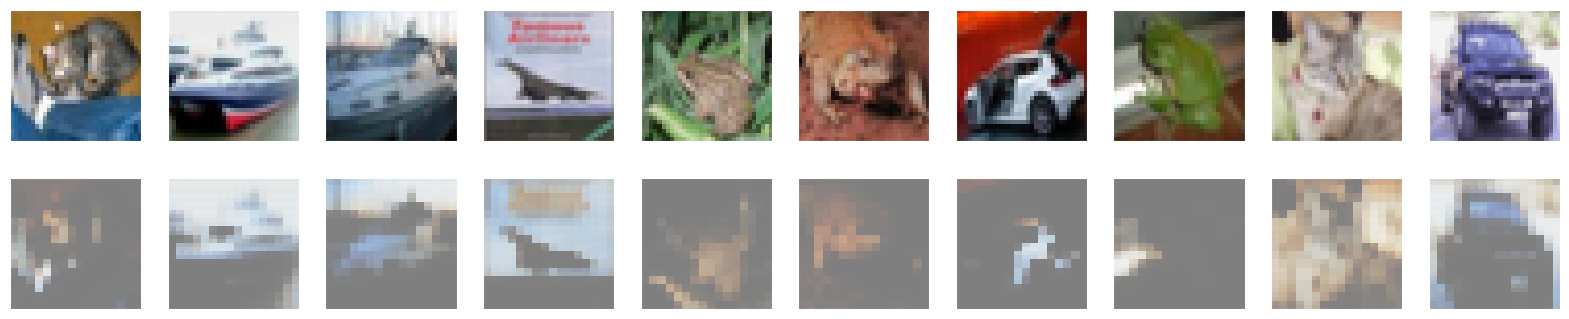

Epoch 1, Loss: 0.23586621326025184
Epoch 2, Loss: 0.19072496626154542
Epoch 3, Loss: 0.18634884350973627
Epoch 4, Loss: 0.18537822304784185
Epoch 5, Loss: 0.1850927998800107
Epoch 6, Loss: 0.18502921027981717
Epoch 7, Loss: 0.18500116404593753
Epoch 8, Loss: 0.1849965889130712
Epoch 9, Loss: 0.18501406656506728
Epoch 10, Loss: 0.18492401284558693
Training finished
lr=0.1, wd=0.01
Validation Loss: 0.18213564110030034


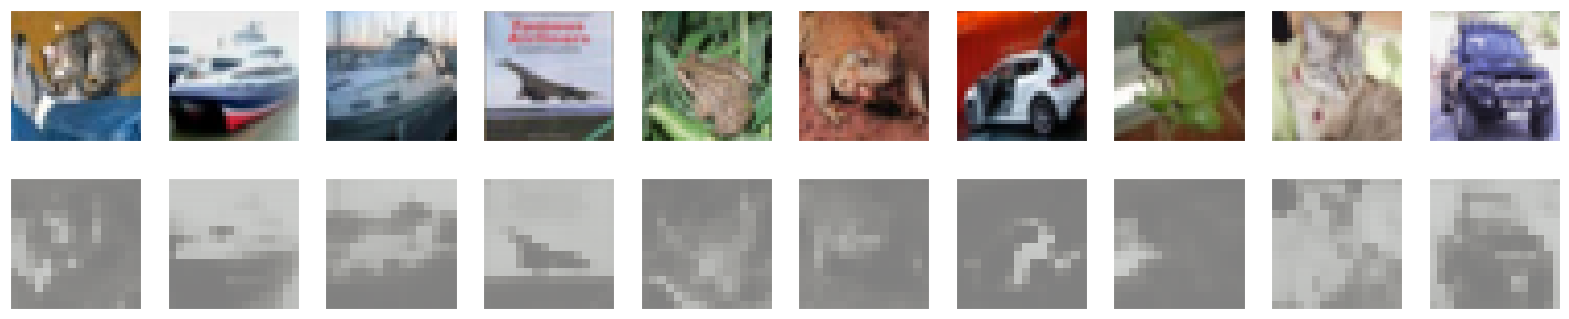

In [18]:
lr_params = [0.001, 0.01, 0.1]
wd_params = [1e-6, 1e-4, 1e-2]

for learning_rate in lr_params:
    for wd in wd_params:
        autoencoder = Autoencoder(code_dim=64)  
        criterion = nn.MSELoss()  
        optimizer = optim.SGD(autoencoder.parameters(), lr=learning_rate, weight_decay=wd)  

        num_epochs = 10  

        for epoch in range(num_epochs):
            running_loss = 0.0
            for data in train_loader:
                inputs, _ = data
                optimizer.zero_grad()
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs) 
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

        print("Training finished")

        validation_loss = 0.0

        autoencoder.eval()

        with torch.no_grad():
            for data in test_loader:
                inputs, _ = data
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs)
                validation_loss += loss.item()

        print(f"lr={learning_rate}, wd={wd}\nValidation Loss: {validation_loss/len(test_loader)}")

        autoencoder.train()

        dataiter = iter(test_loader)
        images, _ = next(dataiter)

        reconstructed_images, _ = autoencoder(images)

        visualize_images(images, reconstructed_images, num_images=10)

PMSprop

Epoch 1, Loss: 0.19299189673017358
Epoch 2, Loss: 0.14609032010902528
Epoch 3, Loss: 0.14523128134286617
Epoch 4, Loss: 0.14500744273061947
Epoch 5, Loss: 0.1448174384053406
Epoch 6, Loss: 0.14472873054463845
Epoch 7, Loss: 0.1446533203029724
Epoch 8, Loss: 0.14463759802491463
Epoch 9, Loss: 0.14454253089359348
Epoch 10, Loss: 0.1445565943789604
Training finished
lr=0.001, alpha=0.8
Validation Loss: 0.14152710486179704


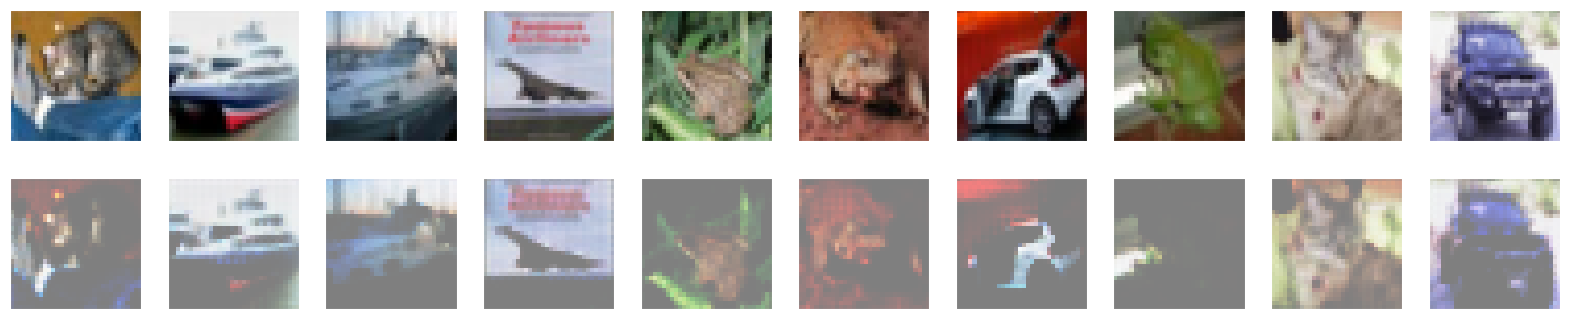

Epoch 1, Loss: 0.18639859292284608
Epoch 2, Loss: 0.14605877802843023
Epoch 3, Loss: 0.14520736429316308
Epoch 4, Loss: 0.14493623361601243
Epoch 5, Loss: 0.144797918655912
Epoch 6, Loss: 0.14473105344892767
Epoch 7, Loss: 0.14453872797243736
Epoch 8, Loss: 0.14456733362868313
Epoch 9, Loss: 0.14447760015078212
Epoch 10, Loss: 0.14448360079313483
Training finished
lr=0.001, alpha=0.9
Validation Loss: 0.14138360724897142


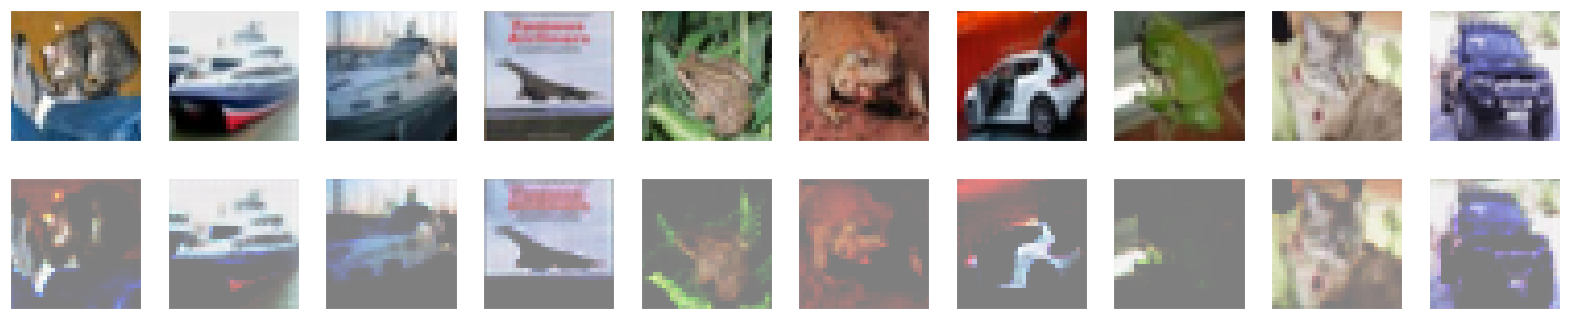

Epoch 1, Loss: 0.17174412217705756
Epoch 2, Loss: 0.14686675734646484
Epoch 3, Loss: 0.14529722531700073
Epoch 4, Loss: 0.14483567323449933
Epoch 5, Loss: 0.14452046360772894
Epoch 6, Loss: 0.14449438067805737
Epoch 7, Loss: 0.14436926436431877
Epoch 8, Loss: 0.14430556982717552
Epoch 9, Loss: 0.14434708107996475
Epoch 10, Loss: 0.14428280194854493
Training finished
lr=0.001, alpha=0.99
Validation Loss: 0.14121737079635546


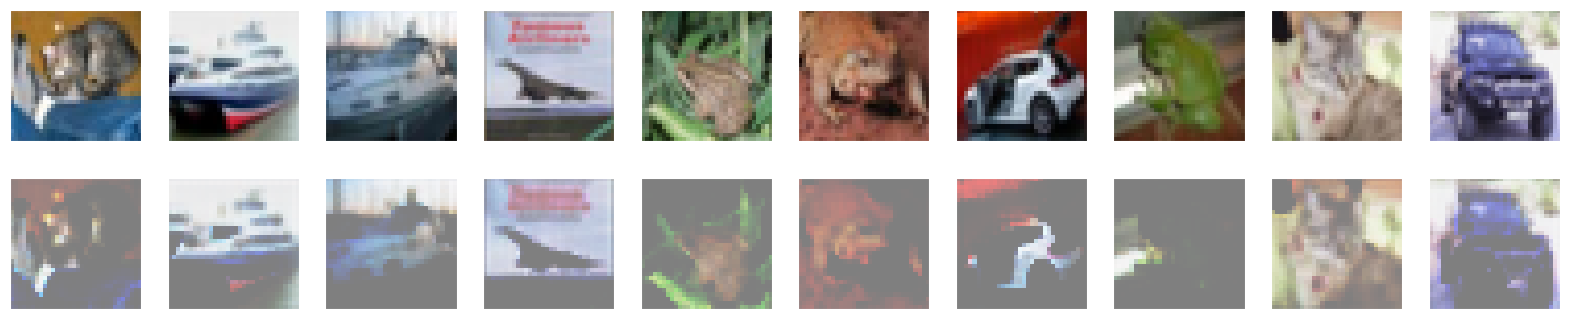

Epoch 1, Loss: 0.15202740798978245
Epoch 2, Loss: 0.145547826357586
Epoch 3, Loss: 0.14518480666953584
Epoch 4, Loss: 0.1450921111380505
Epoch 5, Loss: 0.14500091044837252
Epoch 6, Loss: 0.14501017926599058
Epoch 7, Loss: 0.1450114680258819
Epoch 8, Loss: 0.14497284344433214
Epoch 9, Loss: 0.1448987572051375
Epoch 10, Loss: 0.14488936849224293
Training finished
lr=0.01, alpha=0.8
Validation Loss: 0.14154537192955138


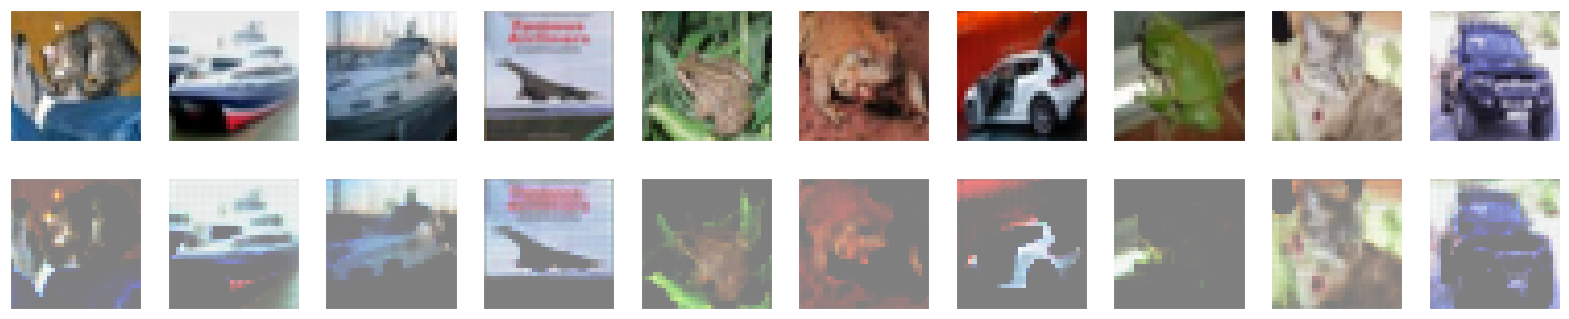

Epoch 1, Loss: 0.150547861662286
Epoch 2, Loss: 0.14541411322667774
Epoch 3, Loss: 0.14519017798554562
Epoch 4, Loss: 0.1450256429364919
Epoch 5, Loss: 0.14499566850759793
Epoch 6, Loss: 0.14493722074172077
Epoch 7, Loss: 0.14483532816400307
Epoch 8, Loss: 0.144827934091582
Epoch 9, Loss: 0.14484809263778464
Epoch 10, Loss: 0.1447951493837187
Training finished
lr=0.01, alpha=0.9
Validation Loss: 0.1419745723533023


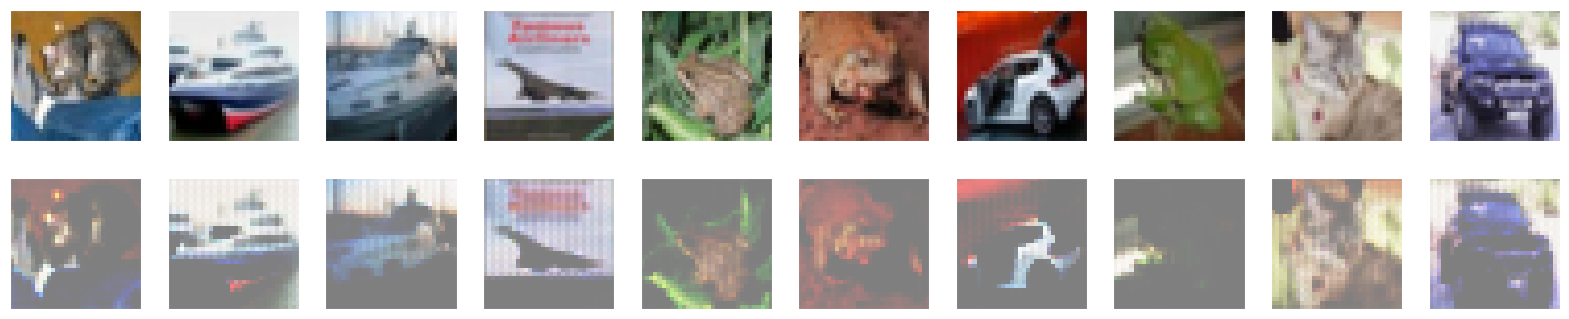

Epoch 1, Loss: 0.14846256641132752
Epoch 2, Loss: 0.14545130844006454
Epoch 3, Loss: 0.14524588235618208
Epoch 4, Loss: 0.14512265315446096
Epoch 5, Loss: 0.14506978491116362
Epoch 6, Loss: 0.14506175192763737
Epoch 7, Loss: 0.14501010344537626
Epoch 8, Loss: 0.14502244168306555
Epoch 9, Loss: 0.14501631994495917
Epoch 10, Loss: 0.14502207157404526
Training finished
lr=0.01, alpha=0.99
Validation Loss: 0.14244826346825643


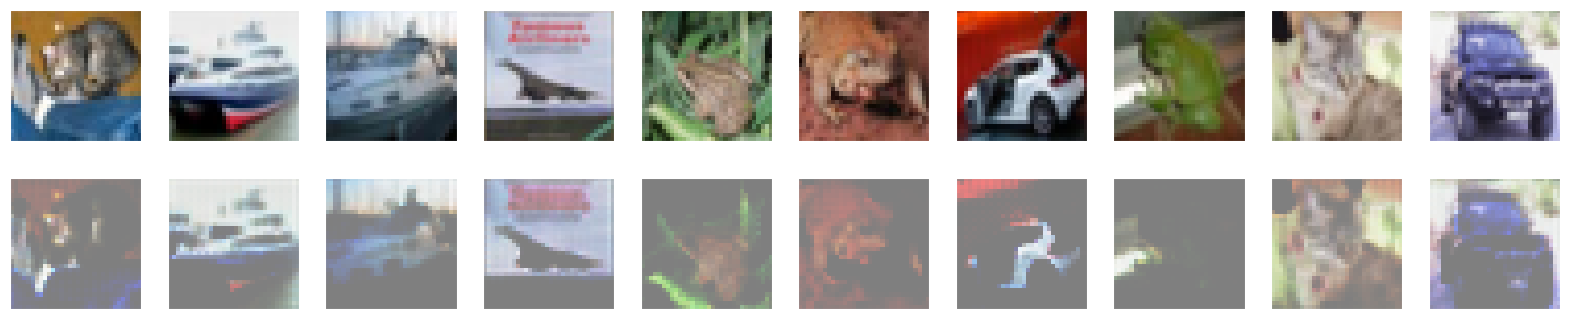

Epoch 1, Loss: 0.15386765620783163
Epoch 2, Loss: 0.15137100395987102
Epoch 3, Loss: 0.15118994761039228
Epoch 4, Loss: 0.15117308704177743
Epoch 5, Loss: 0.15114858514055265
Epoch 6, Loss: 0.15098556682772343
Epoch 7, Loss: 0.15110240462224198
Epoch 8, Loss: 0.1511109714941753
Epoch 9, Loss: 0.15100219192178657
Epoch 10, Loss: 0.15104214972852137
Training finished
lr=0.1, alpha=0.8
Validation Loss: 0.14760964425506107


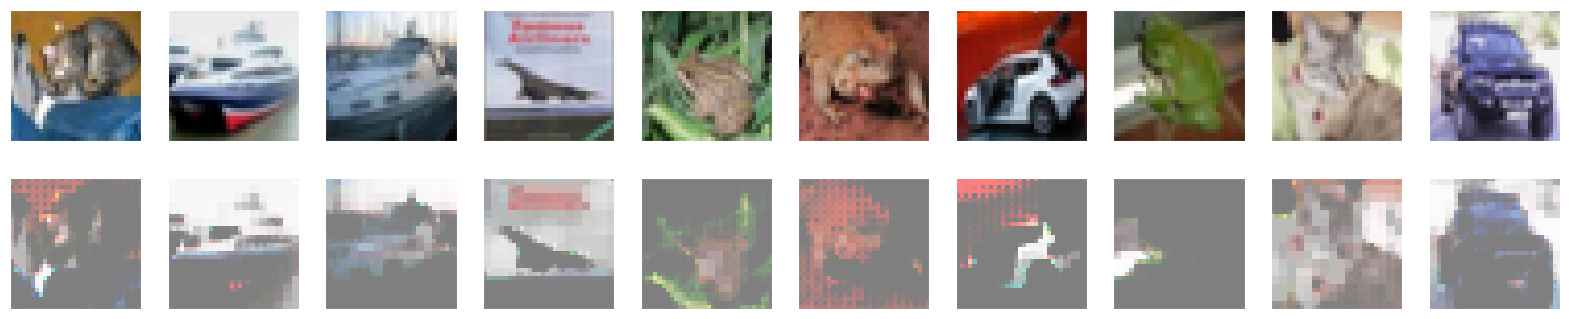

Epoch 1, Loss: 0.154984332468656
Epoch 2, Loss: 0.15163219649620982
Epoch 3, Loss: 0.1513896969139881
Epoch 4, Loss: 0.15141285391872192
Epoch 5, Loss: 0.1511597683953355
Epoch 6, Loss: 0.15101161900231297
Epoch 7, Loss: 0.15102964592978474
Epoch 8, Loss: 0.15102300524254283
Epoch 9, Loss: 0.15106906832369696
Epoch 10, Loss: 0.15106608422325396
Training finished
lr=0.1, alpha=0.9
Validation Loss: 0.14584917575120926


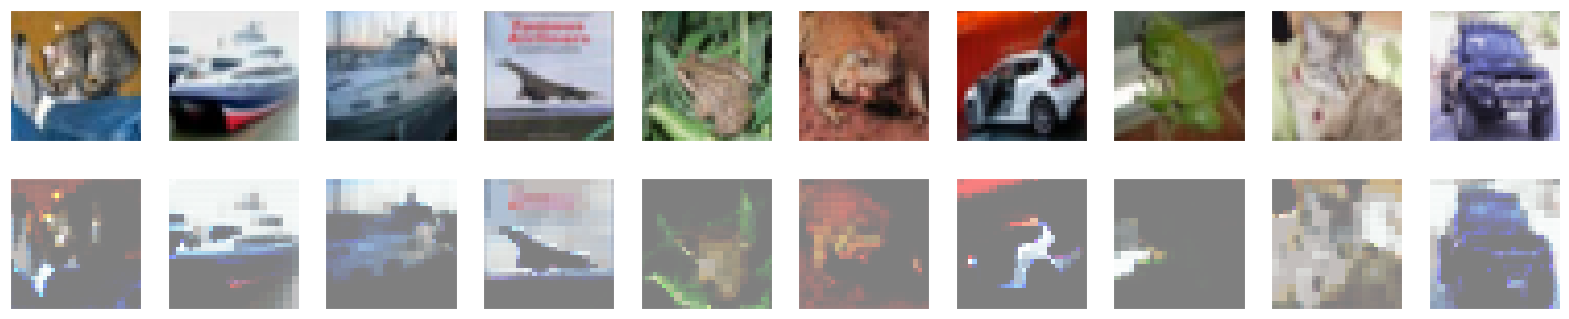

Epoch 1, Loss: 0.18528031540648712
Epoch 2, Loss: 0.1550460734959606
Epoch 3, Loss: 0.15422224575448829
Epoch 4, Loss: 0.15380455847934385
Epoch 5, Loss: 0.15381057706216109
Epoch 6, Loss: 0.15410629181605776
Epoch 7, Loss: 0.15591929105046154
Epoch 8, Loss: 0.1542199980705748
Epoch 9, Loss: 0.15501386628431432
Epoch 10, Loss: 0.15337169776334786
Training finished
lr=0.1, alpha=0.99
Validation Loss: 0.14986861117516354


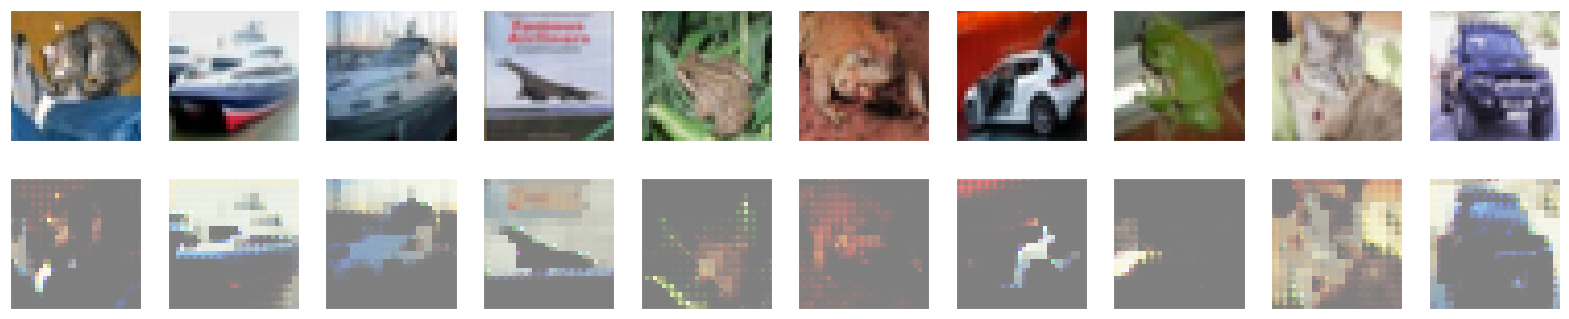

In [19]:
lr_params = [0.001, 0.01, 0.1]
alpha_params = [0.8, 0.9, 0.99]

for learning_rate in lr_params:
    for alpha in alpha_params:
        autoencoder = Autoencoder(code_dim=64)  
        criterion = nn.MSELoss() 
        optimizer = optim.RMSprop(autoencoder.parameters(), lr=learning_rate, alpha=alpha)  

        num_epochs = 10  

        for epoch in range(num_epochs):
            running_loss = 0.0
            for data in train_loader:
                inputs, _ = data
                optimizer.zero_grad()
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs)  # Вычислите функцию потерь
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

        print("Training finished")

        validation_loss = 0.0

        autoencoder.eval()

        with torch.no_grad():
            for data in test_loader:
                inputs, _ = data
                outputs, _ = autoencoder(inputs)
                loss = criterion(outputs, inputs)
                validation_loss += loss.item()

        print(f"lr={learning_rate}, alpha={alpha}\nValidation Loss: {validation_loss/len(test_loader)}")

        autoencoder.train()

        dataiter = iter(test_loader)
        images, _ = next(dataiter)

        reconstructed_images, _ = autoencoder(images)

        visualize_images(images, reconstructed_images, num_images=10)